In [0]:
### housing price analysis

In [0]:
import os
import tarfile

In [3]:
! wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz

--2020-03-13 20:59:07--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.06s   

2020-03-13 20:59:07 (6.33 MB/s) - ‘housing.tgz’ saved [409488/409488]



In [0]:
import numpy as np
import pandas as pd
def extractDataAndLoad():
  housing_tgz = tarfile.open('housing.tgz')
  housing_tgz.extractall()
  housing_tgz.close()
  data = pd.read_csv('housing.csv')
  return data

In [0]:
df = extractDataAndLoad()

In [12]:
df.head() ## this is the data head

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df.info()  ## ti will give you data info and other parameter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


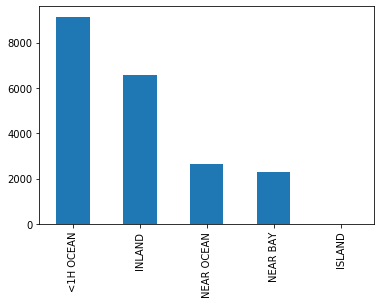

In [18]:
df['ocean_proximity'].value_counts().plot(kind='bar')

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f409d98cba8>,
      dtype=object)

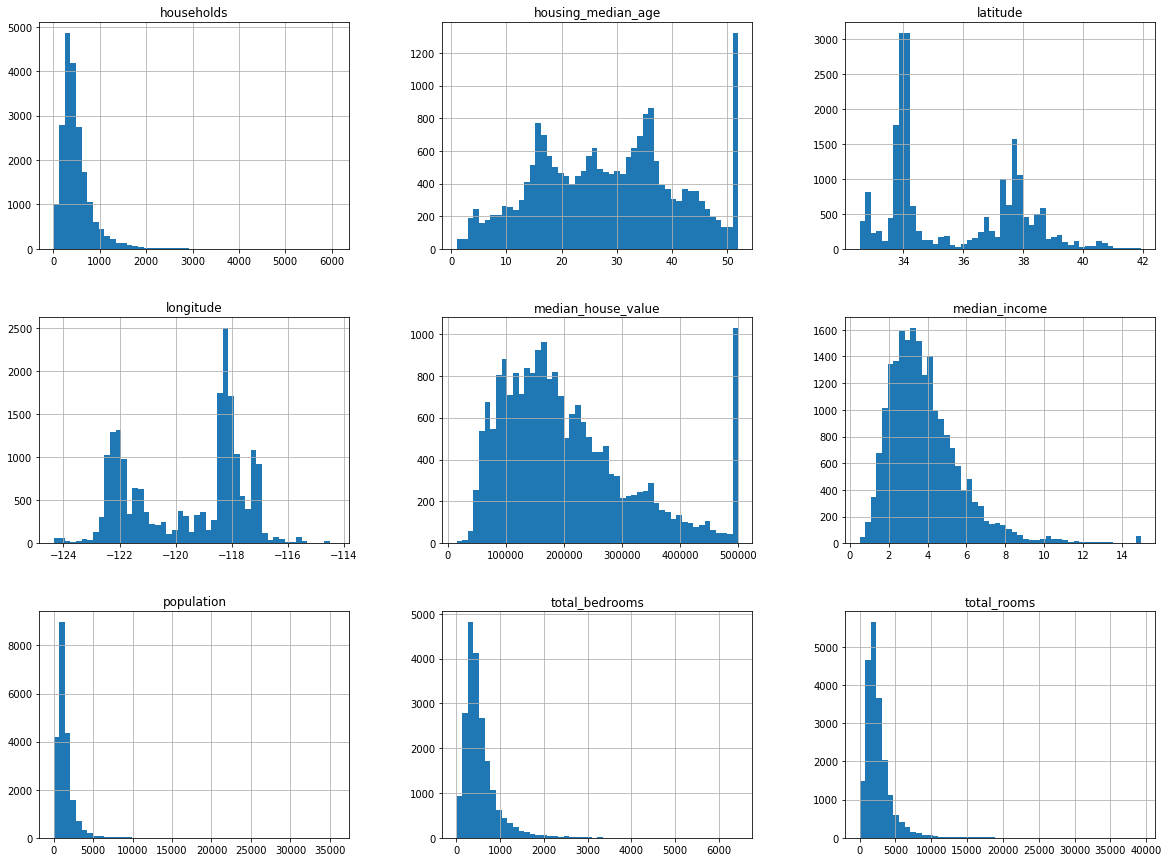

In [20]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

In [0]:
from sklearn.model_selection import train_test_split
train,test  = train_test_split(df,test_size=.2)

In [22]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6963,-118.06,33.99,38.0,862.0,178.0,484.0,176.0,4.3750,186200.0,<1H OCEAN
18419,-121.82,37.26,10.0,3030.0,574.0,1623.0,589.0,5.1356,218700.0,<1H OCEAN
16978,-122.30,37.57,36.0,1973.0,352.0,1169.0,370.0,5.0330,270900.0,NEAR BAY
7333,-118.18,33.97,34.0,3214.0,899.0,3086.0,808.0,2.0057,189400.0,<1H OCEAN
336,-122.17,37.74,46.0,1026.0,226.0,749.0,225.0,3.0298,107600.0,NEAR BAY


In [23]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19587,-120.80,37.61,30.0,918.0,154.0,469.0,139.0,3.9688,175000.0,INLAND
10284,-117.83,33.90,23.0,2446.0,360.0,1196.0,359.0,6.5755,272800.0,<1H OCEAN
16557,-121.27,37.82,26.0,1170.0,238.0,830.0,216.0,2.6458,127500.0,INLAND
3127,-118.01,35.12,15.0,1926.0,361.0,917.0,316.0,3.3889,68500.0,INLAND
6183,-117.91,34.09,20.0,4327.0,1037.0,2296.0,963.0,3.0441,185400.0,<1H OCEAN


In [25]:
print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


In [0]:
## we create a copy of the data set to visualize the data
housing = df.copy()

In [27]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


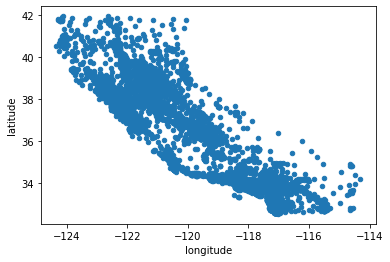

In [30]:
housing.plot(kind='scatter',x='longitude',y = 'latitude')

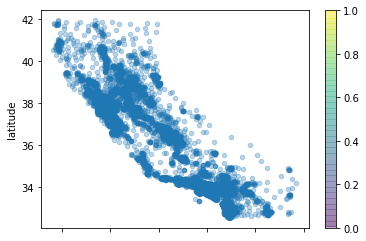

In [33]:
housing.plot(kind='scatter',x='longitude',y = 'latitude',alpha=0.3,colorbar=True)

In [0]:
## look at the correlation
corr = housing.corr()

In [0]:
import seaborn as sns

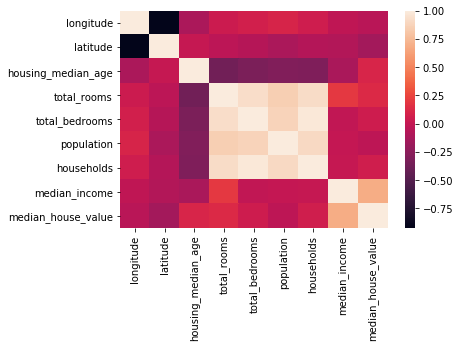

In [37]:
sns.heatmap(corr)

In [40]:
## there is another way of finding correlation with plot is
from pandas.plotting import scatter_matrix
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f408a0324a8>,
      dtype=object)

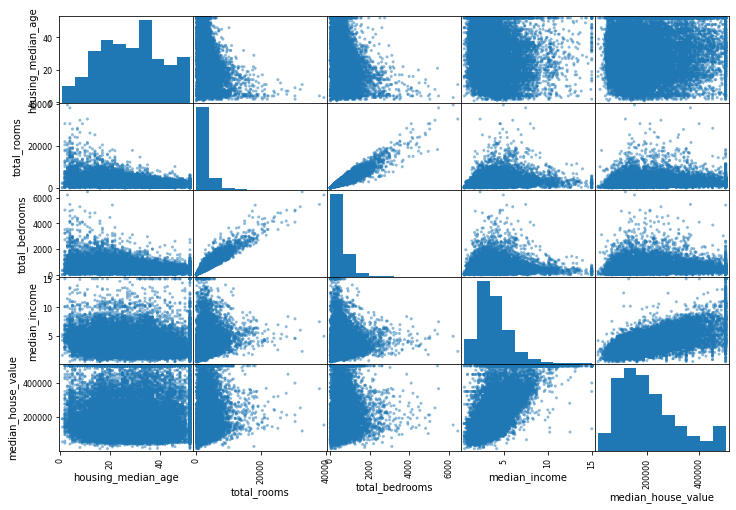

In [42]:
scatter_matrix(housing[['housing_median_age','total_rooms','total_bedrooms','median_income',
       'median_house_value']],figsize=(12,8))

In [0]:
### with thsis relation you can find which one column is most important
### and which column you will remove
tg_rel = housing.corr()['median_house_value'].sort_values(ascending=False)

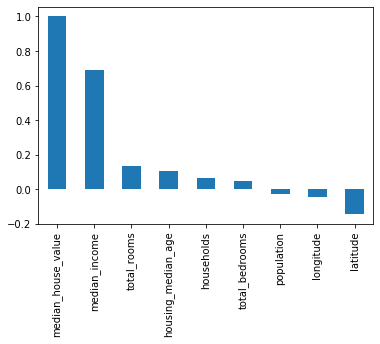

In [48]:
tg_rel.plot(kind='bar')

In [0]:
### feture engineering
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [0]:
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']

In [0]:
housing['population_per_household'] = housing['population']/housing['households']

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [0]:
tg_rel = housing.corr()['median_house_value'].sort_values(ascending=False)

In [55]:
tg_rel

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

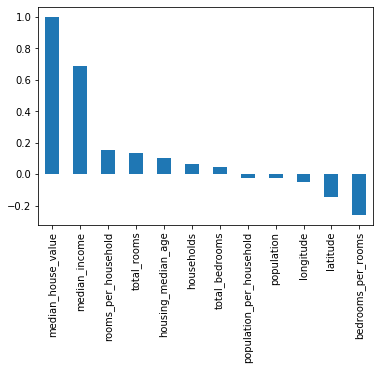

In [56]:
tg_rel.plot(kind='bar')

In [57]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_rooms          207
population_per_household      0
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
imputer = SimpleImputer(strategy='median')

In [0]:
## imputer cant work with the stringvalue
housing_num = housing.drop('ocean_proximity',axis=1)

In [65]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [66]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
X = imputer.transform(housing_num)

In [0]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [71]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [73]:
housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_rooms          0
population_per_household    0
dtype: int64

In [0]:
## encode the occean proximity
## in this case we do the one_hot_encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [76]:
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [0]:
housing_cat = housing[['ocean_proximity']]

In [0]:
one_hot = encoder.fit_transform(housing_cat)

In [89]:
one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [0]:
dfDummies = pd.get_dummies(housing_cat)

In [0]:
df = pd.concat([housing_tr, dfDummies], axis=1)

In [129]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


In [0]:
X = df.drop('median_house_value',axis=1)
y = df[['median_house_value']]

In [131]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_rooms,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0


In [132]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
mn1 = MinMaxScaler()

In [0]:
X_final = mn1.fit_transform(X)

In [0]:
mn2 = MinMaxScaler()

In [0]:
final_y = mn2.fit_transform(y)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [0]:
lr = LinearRegression()

In [144]:
lr.fit(X_final,final_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred1 = lr.predict(X_final)

In [0]:
fn_predict1 = mn2.inverse_transform(pred1)

In [0]:
dt = DecisionTreeRegressor()

In [150]:
dt.fit(X_final,final_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
pr2 = dt.predict(X_final)

In [0]:
pr2 = pr2.reshape(-1,1)

In [0]:
fn_predict2 = mn2.inverse_transform(pr2)

In [161]:
fn_predict2

array([[452600.],
       [358600.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(dt,X_final,final_y,cv=10)

In [164]:
scores

array([-0.51400609,  0.57857776,  0.25357671,  0.24107517,  0.51658356,
        0.46434928,  0.13003603,  0.28578169,  0.29903199,  0.36466979])

In [165]:
scores.mean()

0.2619675889845318

In [0]:
from sklearn.ensemble import RandomForestRegressor
rd = RandomForestRegressor()

In [169]:
scores = cross_val_score(rd,X_final,final_y,cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [170]:
scores

array([0.46749685, 0.64799839, 0.73739455, 0.41712987, 0.73263168])

In [171]:
scores.mean()

0.6005302675348078

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'bootstrap': [False],
 #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
 'n_estimators': [3,10,30]}


In [180]:
param_grid

{'bootstrap': [False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [3, 10, 30]}

In [0]:
forest_reg = RandomForestRegressor()

In [0]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=3)

In [197]:
grid_search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [198]:
import sklearn
sklearn.metrics.SCORERS.keys()
grid_search.fit(X_final,final_y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [200]:
grid_search.score(X_final,final_y)

0.9999999967341522

In [201]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 30}

In [202]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_

In [204]:
cvres

{'mean_fit_time': array([0.70430374, 2.29576826, 6.87460224, 0.20216338, 0.6773359 ,
        2.00387359]),
 'mean_score_time': array([0.00723839, 0.01487398, 0.04203478, 0.00744263, 0.01488098,
        0.04156621]),
 'mean_test_score': array([0.36700128, 0.36506624, 0.37572258, 0.53604908, 0.60811827,
        0.65108192]),
 'param_bootstrap': masked_array(data=[False, False, False, False, False, False],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[3, 10, 30, 3, 10, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 3},
  {'bootstrap':

In [206]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
  print(mean_score,params)

0.3670012787370946 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 3}
0.36506623578107766 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 10}
0.37572258098274 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 30}
0.5360490786024888 {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 3}
0.6081182720800665 {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 10}
0.6510819161973346 {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 30}
